<a href="https://colab.research.google.com/github/Razan0k/R-T/blob/main/Razan_TYMRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
#numpy allows to manupilating files
import pandas as pd
#used for data analysis

In [ ]:
# Connecting to Google Drive
# This code was used during the training and evaluation period

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
list_files = []
friday_afternoon_ddos_df = pd.read_csv(r"/content/gdrive/MyDrive/Friday-WorkingHours-Afternoon-DDos.csv", index_col=None)
#This function is used to read the found CSV file
list_files.append(friday_afternoon_ddos_df)
#is used to append the DataFrame
friday_afternoon_port_df = pd.read_csv(r"/content/gdrive/MyDrive/Friday-WorkingHours-Afternoon-PortScan.csv", index_col=None)
#is used to read a CSV file named
list_files.append(friday_afternoon_port_df)
## Concatenate all DataFrames in the list into a single DataFrame
df = pd.concat(list_files, axis=0, ignore_index=True)

In [ ]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512207,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
512208,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
512209,443,161800,70,103,1427,215903,570,0,20.385714,90.746389,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
512210,443,142864,50,62,1331,110185,570,0,26.620000,107.027727,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.columns = df.columns.str.strip()
print("original length of df:", len(df))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print("after droping null values, the length of df:", len(df))

original length of df: 512212
after droping null values, the length of df: 511807


In [ ]:
temp = df[df['Label'] == 'BENIGN']
#temp = temp.sample(int(len(temp)/2) )
temp['Destination Port'].describe()
#temp = temp.sample(frac=0.0005)
print(temp.shape)
temp1 = df[df['Label'] != 'BENIGN']
#df = df.sample(int(len(df)/4) )
print(temp1.shape)
df = pd.concat([temp1,temp])
print(df.shape)

(224978, 79)
(286829, 79)
(511807, 79)


In [ ]:
# Method used to remove features that are found on a list
# Primarily used to remove constant and quasi-constant features

def new_dataset_remove(dataset, res):

    for column in range(len(res)):
        print(res[column])
        # Removing the feature from the inputted dataset
        dataset = dataset.drop(res[column], axis=1)

    return dataset

In [ ]:
#This is important in order for the computer not to crash.
!pip install fast_ml
# Methods used cleansing constant and quasi-constant features
from fast_ml.utilities import display_all, reduce_memory_usage
from fast_ml.feature_selection import get_constant_features
# Constant features
constant_features = get_constant_features(df)
constant_features_list = constant_features.query("Desc=='Constant'")['Var'].to_list()
print(len(constant_features_list))
print(constant_features_list)
print(df.shape)
# removing quasi-constant featuress
df = new_dataset_remove(df, constant_features_list)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.3 MB/s eta 0:00:00
10
['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
(511807, 79)
Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
CWE Flag Count
Fwd Avg Bytes/Bulk
Fwd Avg Packets/Bulk
Fwd Avg Bulk Rate
Bwd Avg Bytes/Bulk
Bwd Avg Packets/Bulk
Bwd Avg Bulk Rate


In [ ]:
# detecting quasi-constant features
quasi_constant_features_list = constant_features.query("Desc=='Quasi Constant'")['Var'].to_list()
print(len(quasi_constant_features_list))
# removing quasi-constant featuress
df = new_dataset_remove(df, quasi_constant_features_list)

3
RST Flag Count
ECE Flag Count
FIN Flag Count


In [ ]:
df.Label.unique()

array(['DDoS', 'PortScan', 'BENIGN'], dtype=object)

In [ ]:
df.shape

(511807, 66)

(511807, 66)


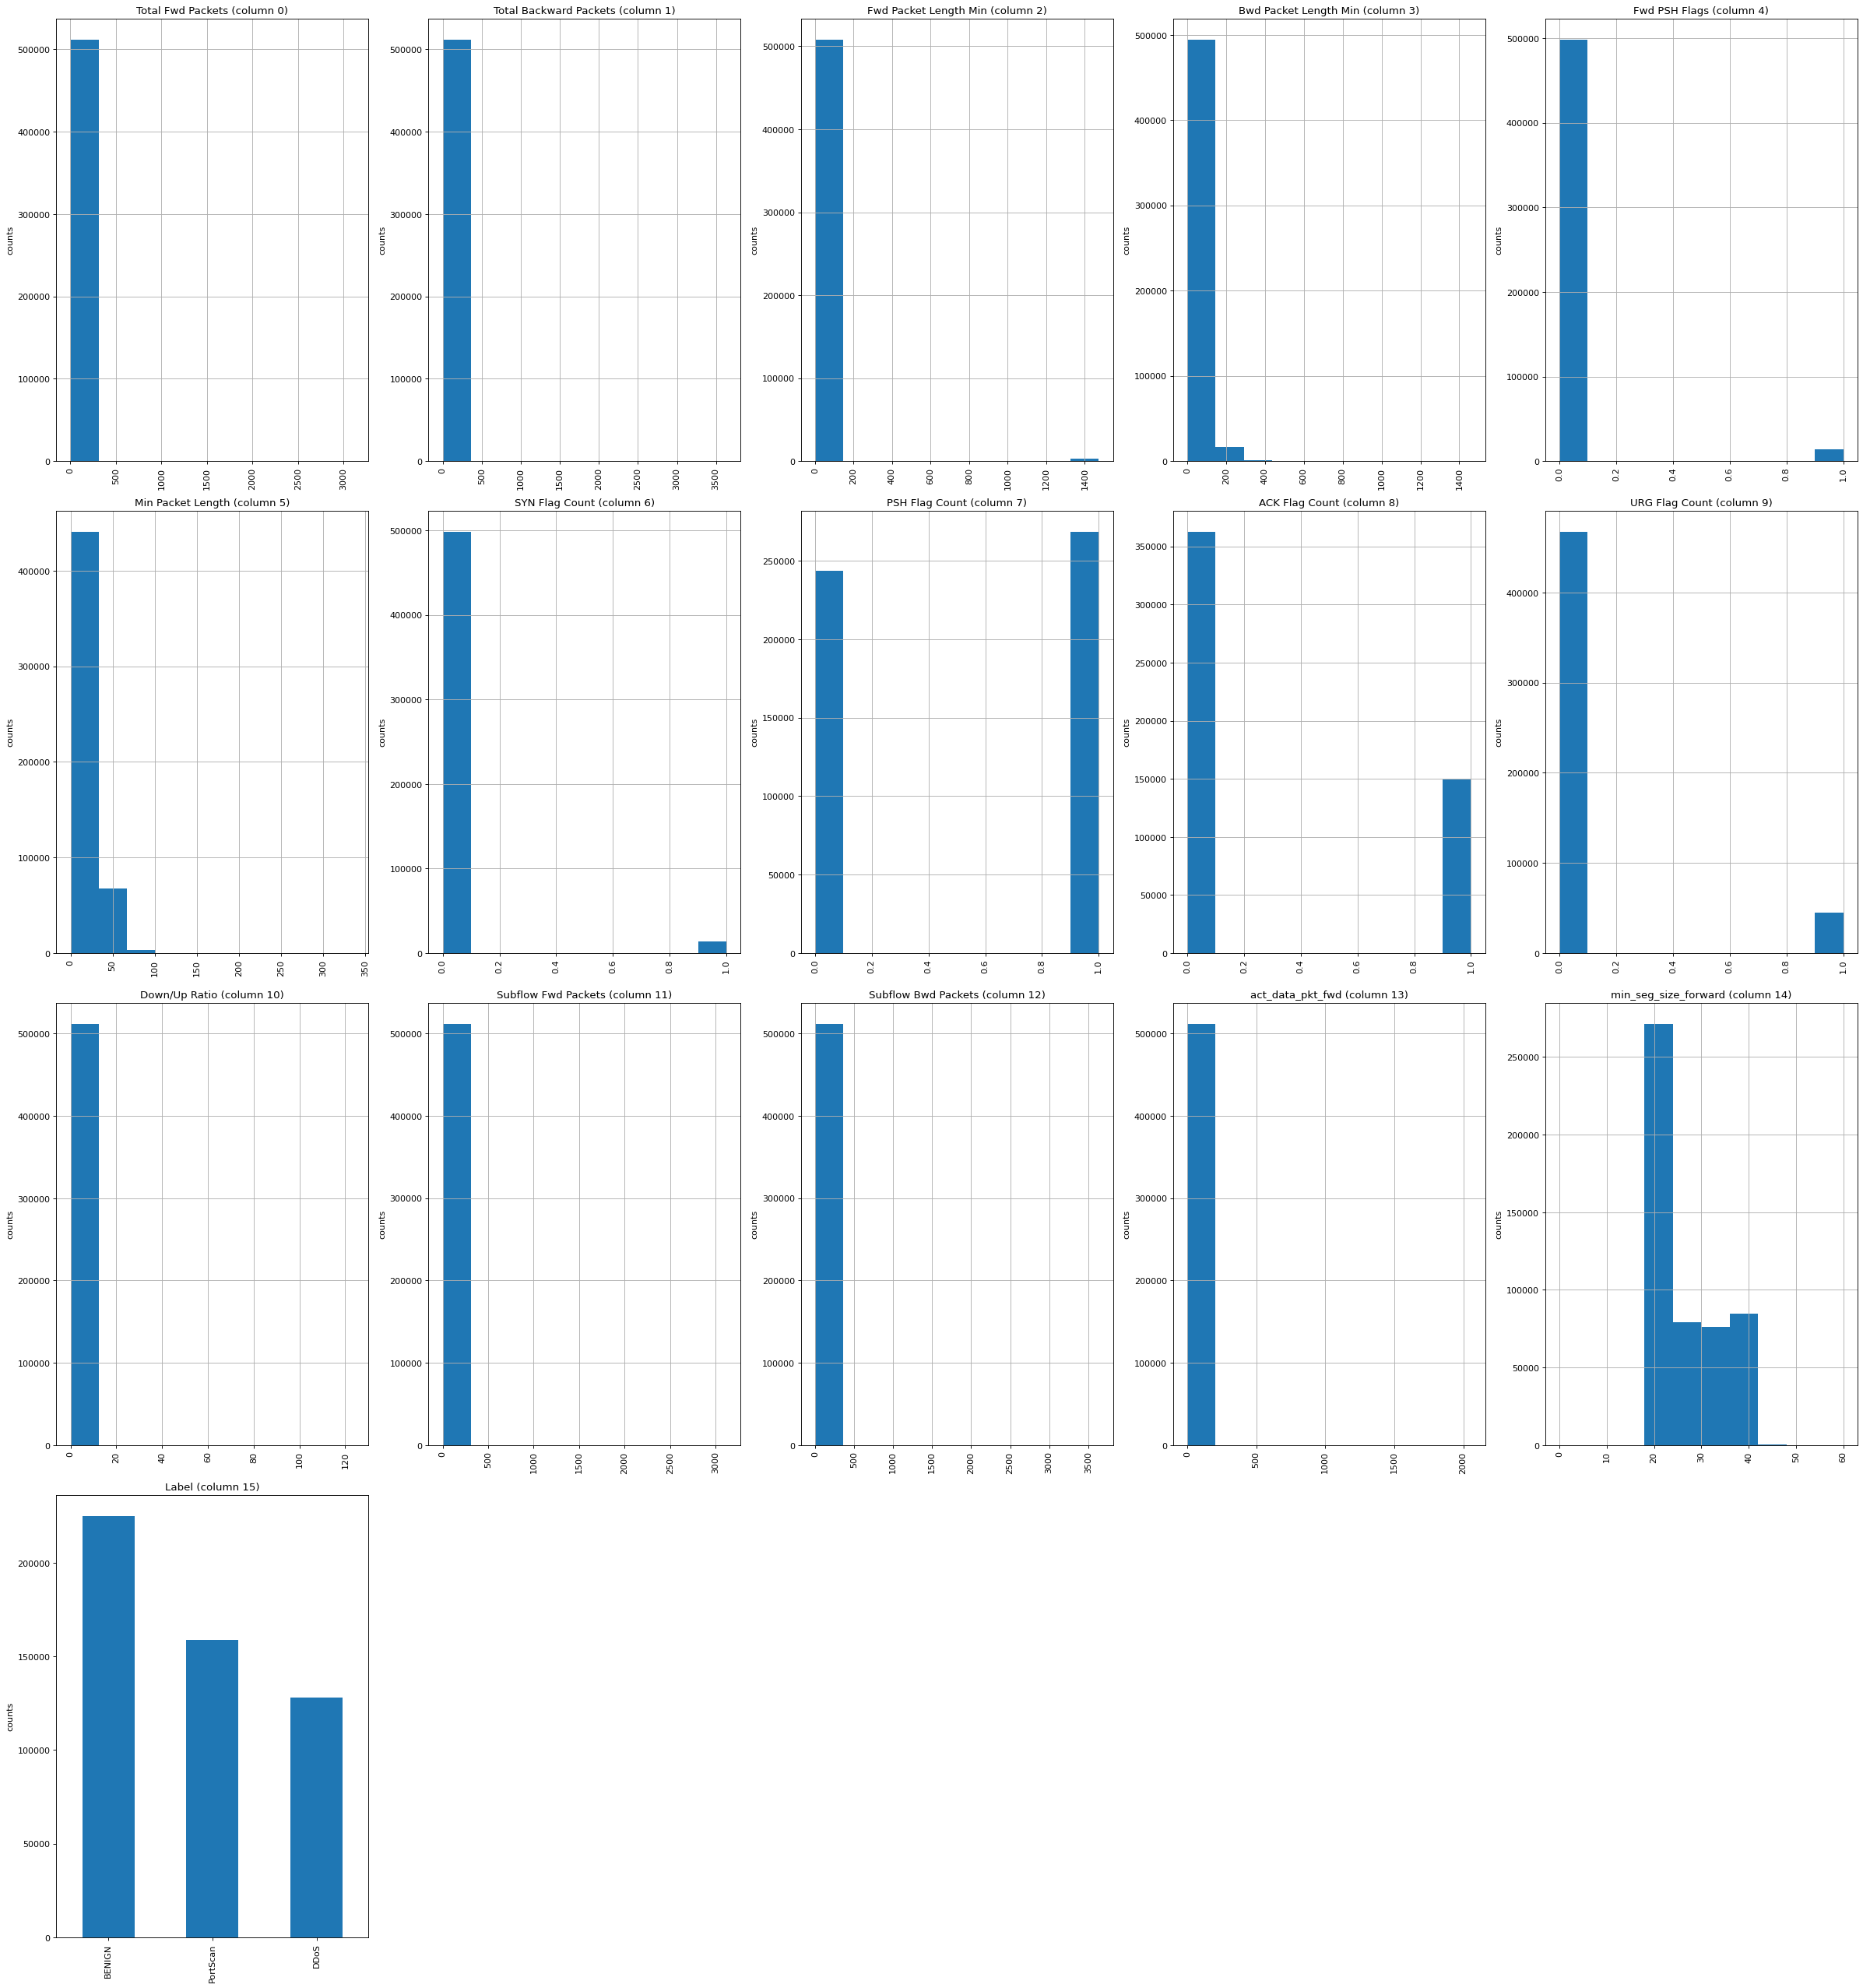

In [ ]:
# Making the graphs
import matplotlib.pyplot as plt
#### Viz dataset columns
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 0 and nunique[col] < 1000]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(int(nGraphRow), nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    nRow, nCol = df.shape
print(df.shape)
plotPerColumnDistribution(df, 40, 5)

In [ ]:
# data split
from sklearn.model_selection import train_test_split
from collections import Counter
y = df.Label
X = df.drop(columns='Label')
labels = y.unique()

classes = y.nunique()
print(X.shape)
print("Traning data:")
print("number of labels:", classes)
print("instances per label\n", y.value_counts())
print("labels:", labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)
print("after spliting the data:\n")
print("training data length:", len(X_train))
print("test data length:", len(X_test))


(511807, 65)
Traning data:
number of labels: 3
instances per label
 BENIGN      224978
PortScan    158804
DDoS        128025
Name: Label, dtype: int64
labels: ['DDoS' 'PortScan' 'BENIGN']
after spliting the data:

training data length: 383855
test data length: 127952


<Axes: xlabel='Label', ylabel='count'>

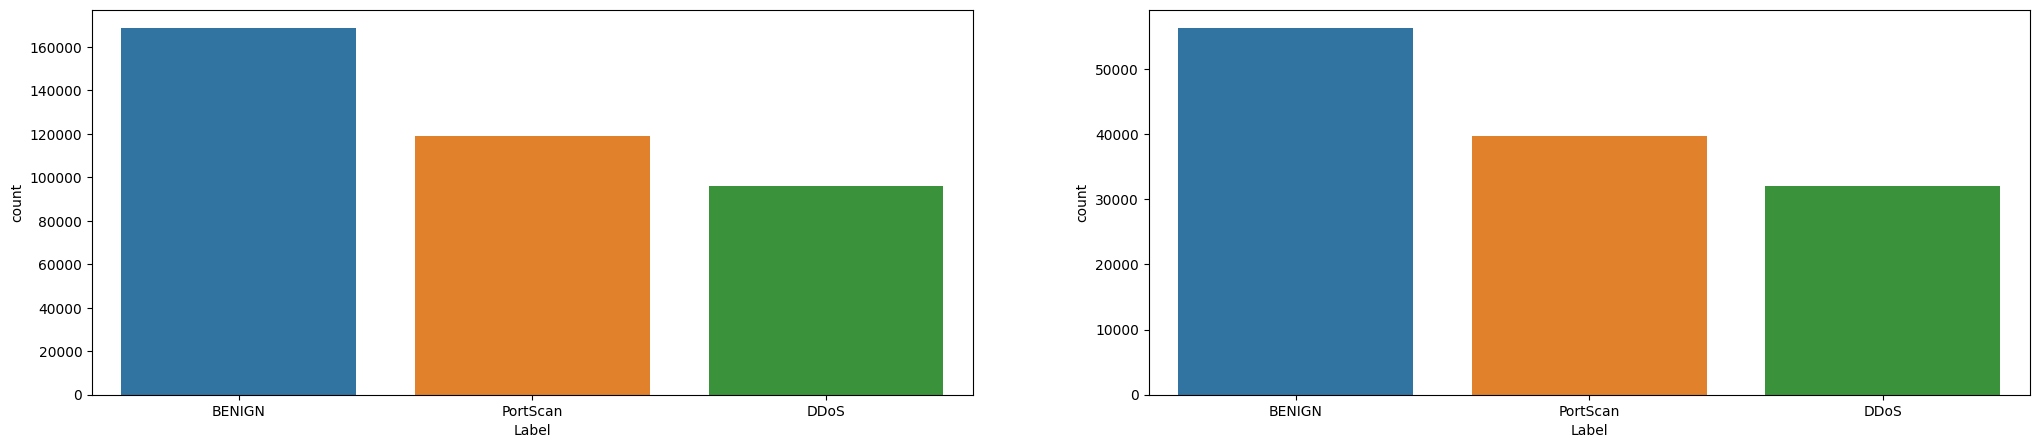

In [ ]:
# Visualise  attacks and normal traffic
import seaborn as sns
f, axes = plt.subplots(1, 2, figsize=(25, 5))

# Create the plots

sns.countplot(x=y_train, data=y_train, ax=axes[0], order = y_train.value_counts().index)
sns.countplot(x=y_test, data=y_test, ax=axes[1], order = y_test.value_counts().index)

In [ ]:
### Set a copy for binary classification:
class_attack = ['PortScan', 'DDoS']
bi_train_y = y_train.copy()
bi_train_y.replace(class_attack, value='ATTACK', inplace=True)
print(bi_train_y.unique())
# bi_train.head(2)

bi_test_y = y_test.copy()
bi_test_y.replace(class_attack, value='ATTACK', inplace=True)
print(bi_test_y.unique())
# bi_train.head(2)

### switch for binary!
y_train = bi_train_y
y_test = bi_test_y

['BENIGN' 'ATTACK']
['ATTACK' 'BENIGN']


<Axes: xlabel='Label', ylabel='count'>

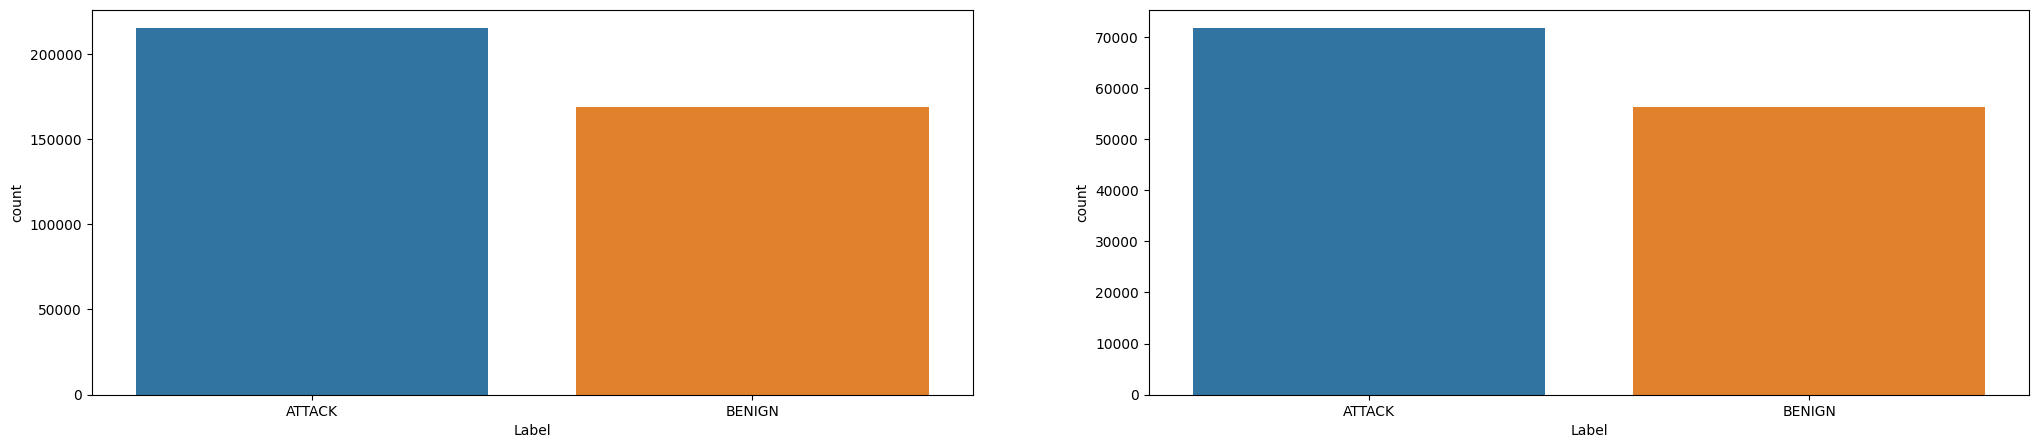

In [ ]:
### a modifier
# Visualise  attacks and normal traffic

f, axes = plt.subplots(1, 2, figsize=(25, 5))

# Create the plots

sns.countplot(x=y_train, data=y_train, ax=axes[0], order = y_train.value_counts().index)
sns.countplot(x=y_test, data=y_test, ax=axes[1], order = y_test.value_counts().index)

In [ ]:
#This is important in order for the computer not to crash.
!pip install fast_ml
# Methods used cleansing constant and quasi-constant features
from fast_ml.utilities import display_all, reduce_memory_usage
from fast_ml.feature_selection import get_constant_features

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
# enc = OneHotEncoder(handle_unknown='ignore')
scaler = MinMaxScaler()
le = LabelEncoder()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("instances per label in training set\n", y_train.value_counts())
y_train = le.fit_transform(y_train)
print("instances per label in test set\n", y_test.value_counts())
y_test = le.transform(y_test)


print(X_train.shape)
print(X_test.shape)
labels_dict = dict(zip(le.classes_, range(len(le.classes_))))
print(labels_dict)

instances per label in training set
 ATTACK    215122
BENIGN    168733
Name: Label, dtype: int64
instances per label in test set
 ATTACK    71707
BENIGN    56245
Name: Label, dtype: int64
(383855, 65)
(127952, 65)
{'ATTACK': 0, 'BENIGN': 1}


In [ ]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 64, activation='tanh', return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 32, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))
#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 128, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 10))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')
#Fitting the RNN to the Training set
history=regressor.fit(X_train, y_train, epochs=2, batch_size=32)

Epoch 1/2
11996/11996 [==============================] - 973s 80ms/step - loss: 0.1196
Epoch 2/2
11996/11996 [==============================] - 950s 79ms/step - loss: 0.2468


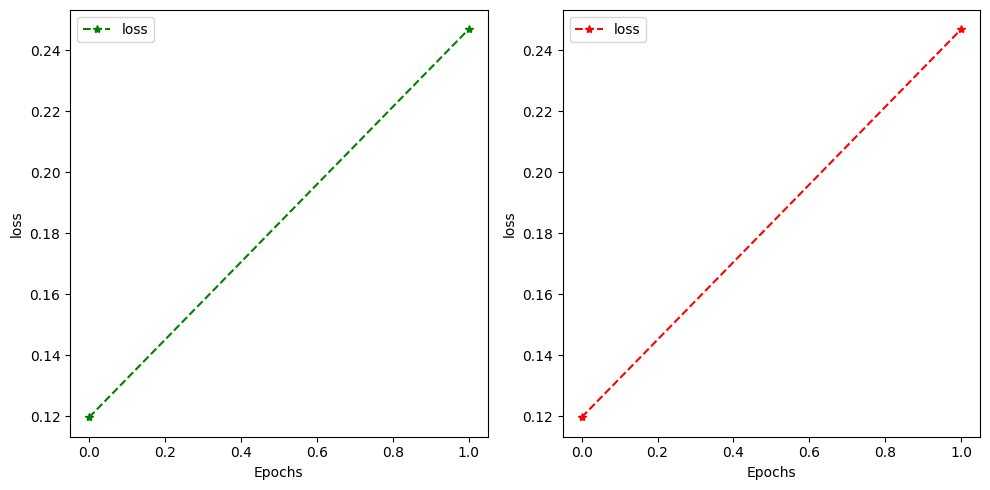

In [ ]:
import matplotlib.pyplot as plt

def plot_mse(history,model):
  fig, ax = plt.subplots(1,2,figsize=(10,5))
  ax[0].plot(history.history['loss'],'g*--', label = "loss")
  ax[0].legend()
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('loss')
  ax[1].plot(history.history['loss'],'r*--', label = "loss")
  ax[1].legend()
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('loss')
  plt.tight_layout()
  plt.show()
plot_mse(history,"IDS-RNN")

In [ ]:
predicted = regressor.predict(X_test)
print(predicted)

3999/3999 [==============================] - 85s 21ms/step
[[0.43596336]
 [0.43596336]
 [0.43596333]
 ...
 [0.43596336]
 [0.43596336]
 [0.4359632 ]]


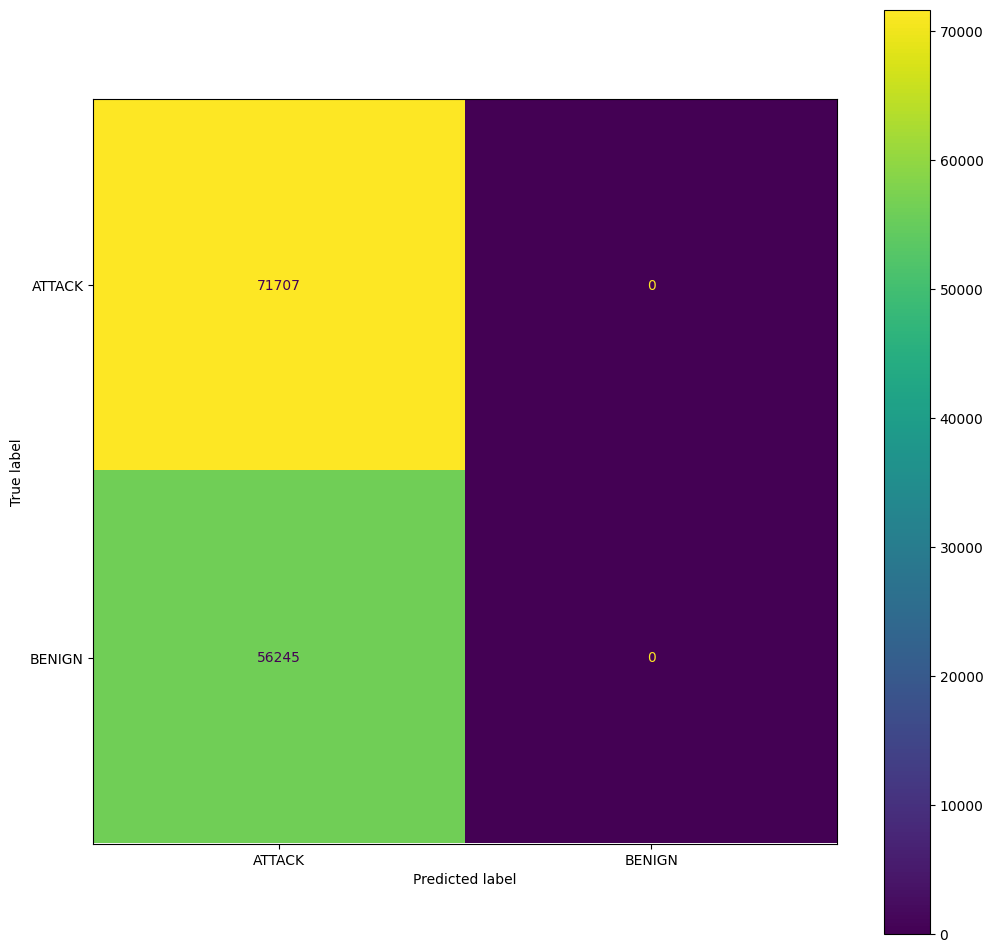

0.560421095410779


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
def ConfusionMatr(yr,yp):
    %matplotlib inline
    cm = confusion_matrix(yr,yp)
    fig, ax = plt.subplots(figsize=(12, 12))
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(ax=ax)
    plt.show()
predicted = np.argmax(predicted, axis=1)
ConfusionMatr(y_test, predicted)
# Returning model answers and the accuracy of the model i.e. how well it predicts the answers.
print(accuracy_score(y_test, predicted))